In [36]:
# Importing all the necessary files required for the first Question
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 

In [37]:
# Upload the dataset
data = pd.read_csv("VideoGameDataset - Video_Games_Sales_as_at_22_Dec_2016.csv")

In [38]:
df = data[['Critic_Score', 'User_Score','Global_Sales']]

EDA

In [39]:
df.columns

Index(['Critic_Score', 'User_Score', 'Global_Sales'], dtype='object')

In [40]:
df.var()

Critic_Score    194.272431
Global_Sales      2.396103
dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  8137 non-null   float64
 1   User_Score    10015 non-null  object 
 2   Global_Sales  16719 non-null  float64
dtypes: float64(2), object(1)
memory usage: 392.0+ KB


In [42]:
df.describe()

,Critic_Score,Global_Sales
count,8137.000000,16719.000000
mean,68.967679,0.533543
std,13.938165,1.547935
min,13.000000,0.010000
25%,60.000000,0.060000
50%,71.000000,0.170000
75%,79.000000,0.470000
max,98.000000,82.530000


In [43]:
df.isna().sum()

Critic_Score    8582
User_Score      6704
Global_Sales       0
dtype: int64

Pre Processing

In [44]:
# User_score column have some string values 'tbd'
df[df.User_Score=='tbd']

,Critic_Score,User_Score,Global_Sales
119,NaN,tbd,6.71
301,61.0,tbd,3.98
520,NaN,tbd,2.81
645,71.0,tbd,2.42
657,73.0,tbd,2.39
...,...,...,...
16699,67.0,tbd,0.01
16701,53.0,tbd,0.01
16702,48.0,tbd,0.01
16708,NaN,tbd,0.01


In [45]:
# Count total rows where " User_Score == tbd "" 
df['User_Score'].where(df['User_Score'] == 'tbd').count()

2425

In [46]:
# Replace "tbd" with nan
df.User_Score.replace('tbd', np.nan,inplace=True)

In [47]:
# Now new Null values
df.isna().sum()

Critic_Score    8582
User_Score      9129
Global_Sales       0
dtype: int64

Need to preprocess these Missing values before procedding further because of its large number.

In [48]:
a = df[(df.isna().sum(axis=1) == 2)].index
len(a)

8009

There are a total of 8009 rows where both input (User_score and Critic_Score) == NaN




In [49]:
# Removing all rows fetched in above step as they are all useless
df.drop(df.index[a],inplace=True)

Shape of dataset after removing NaN values in above step.

In [50]:
df.shape

(8710, 3)

In [51]:
df.isna().sum()

Critic_Score     573
User_Score      1120
Global_Sales       0
dtype: int64

To treat the rest of missing values we go with the generic method of replacing NaN values with the mean of column.

In [52]:
df["User_Score"] = pd.to_numeric(df["User_Score"])

df.fillna(df.mean(), inplace=True)

In [53]:
# Verifying if NaN values are replaces or not 
df.isna().sum()

Critic_Score    0
User_Score      0
Global_Sales    0
dtype: int64

After removing some rows all index's are messed up, so now need ot reset the index column.

In [54]:
df.reset_index(drop=True)

,Critic_Score,User_Score,Global_Sales
0,76.0,8.000000,82.53
1,82.0,8.300000,35.52
2,80.0,8.000000,32.77
3,89.0,8.500000,29.80
4,58.0,6.600000,28.92
...,...,...,...
8705,61.0,5.800000,0.01
8706,53.0,7.125046,0.01
8707,48.0,7.125046,0.01
8708,60.0,7.200000,0.01


Univariate Analysis

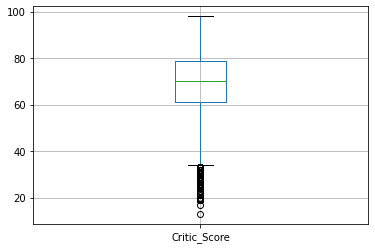

In [55]:
df.boxplot(column=['Critic_Score'])

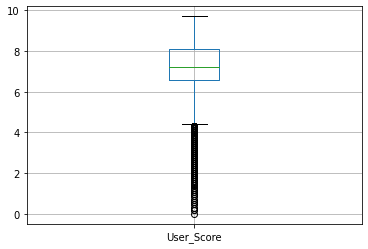

In [56]:
df.boxplot(column=['User_Score'])

Bivariate Analysis

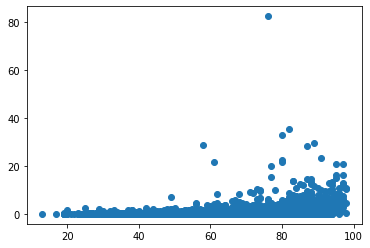

In [57]:
# Relation between Critic_Score and Global_Score
plt.scatter(df['Critic_Score'],df['Global_Sales'])

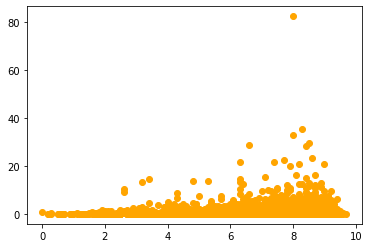

In [58]:
# Relation between User_Score and Global_Score
plt.scatter(df['User_Score'],df['Global_Sales'],c='orange')

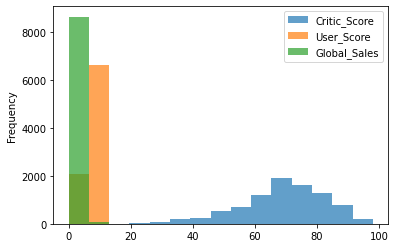

In [59]:
# Comparing the range of values of each column
ax = df.plot.hist(bins=15, alpha=0.7)

There is need of SCALING as Critic_Score is between 20 to 100 else other two are less than 10.

In [60]:
# Divide mean of Critic_Score with the value such that all values are near 20.
# Here that value is 5.
df['Critic_Score'] = df['Critic_Score'].div(6).round(2)

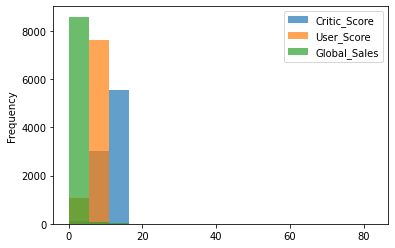

In [61]:
ax = df.plot.hist(bins=15, alpha=0.7)

### Gradient Descent class and necessary functions to implement Linear Regression.  
 
Convergence = 1000 iterations

In [79]:
# LOSS function- Mean Square Error
class GradientDescent:
    def __init__(self, alpha=0.001, iter=1000):
        self.learning_rate, self.iterations = alpha, iter
    
    def fit(self,X,y):
      m1=2 
      m2=2
      c =0
      X1 = np.array(X['Critic_Score'])
      X2 = np.array(X['User_Score'])
      n = 7839
      cost=[]

      for i in range(self.iterations):
        # predicted y
        y_pred = m1*X1 + m2*X2 + c

        #Derivatives
        m1_d = (1/n)*sum((y_pred - y)*X1)
        m2_d = (1/n)*sum((y_pred-y)*X2)
        c_d = (1/n)*sum((y_pred-y))
        
        # new Variables
        m1 = m1 - self.learning_rate*m1_d
        m2 = m2 - self.learning_rate*m2_d
        c = c - self.learning_rate*c_d    

        # Cost Function  
        cost.append( 0.5*(mean_squared_error( y , y_pred ) )) # 0.5 is multiplied just to for 1/2

      self.m1,self.m2,self.c = m1, m2, c
      return cost

    def predict(self, X):
        X1=np.array(X['Critic_Score'])
        X2=np.array(X['User_Score'])
        return (self.m1*X1 + self.m2*X2 + self.c)

    def coeff(self):
      return self.m1, self.m2, self.c

### K-Fold Cross Validation

The choice of number of folds that is value of K will be such that size of each validation partition should be large  enough to provide a good estimate of the model’s performance and also K shjould not be not less such that there is not enough training model to evaluate.

In general, K is selected such that validation(or testing) data is 15%–20% data.

Here total number of rows is 8710.  
Lets take middle value of 15 - 20 that is 17.5  
17.5% of 8710 = 1524.25, say 1524

so, k = 8710/1524 = 5.7, say 6

Therefore, K=6 folds

In [80]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
k = 6
kf = KFold(n_splits=k,shuffle=False)
#model = LinearRegression() 
acc_score = []

model = GradientDescent()

tr_loss = []
test_loss=[]
for train_index , test_index in kf.split(df):

    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index.tolist()] , y.iloc[test_index.tolist()]    
    a = model.fit(X_train,y_train) 

    train_predict = model.predict(X_train)
    tr_loss.append(( mean_squared_error(y_train , train_predict) )) # test loss for each value

    pred_values = model.predict(X_test)      
    test_loss.append(( mean_squared_error(y_test , pred_values)) ) # test loss for each value   

print("Coefficients of Model",model.coeff())

Coefficients of Model (0.051680541405412096, 0.06716100057331745, -0.24166365527857417)


First Plot is of Cost Function V/S Iteration (1000) - GRADIENT DESCENT

Second Plot is of Training Loss V/S K fold

Third Plot is of Testing Loss V/S K fold


Number of iterations V/S Cost function



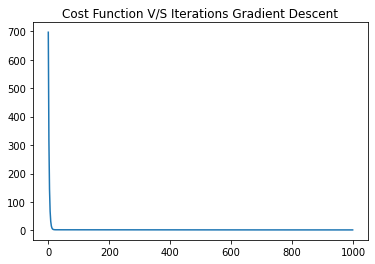

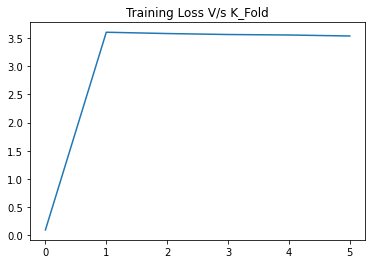

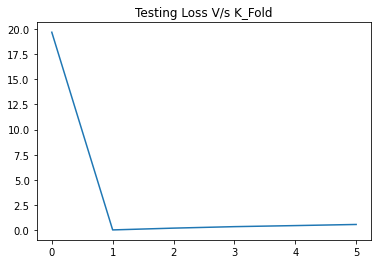

In [81]:
# Cost Function v/s iterations
print("Number of iterations V/S Cost function\n")
plt.title('Cost Function V/S Iterations Gradient Descent')
plt.plot(a) 
plt.show()

print('\n') 
# Training Loss in K Fold
plt.title('Training Loss V/s K_Fold')
plt.plot(tr_loss) 
plt.show()

print('\n')
# Validation Loss in K Fold
plt.title('Testing Loss V/s K_Fold')
plt.plot(test_loss) 
plt.show()